In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
%matplotlib inline

D:\3kurs1sem\IDEs\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'd:\\3kurs1sem\\semestrone\\keras\\catanddogs\\train'
valid_path = 'd:\\3kurs1sem\\semestrone\\keras\\catanddogs\\valid'
test_path = 'd:\\3kurs1sem\\semestrone\\keras\\catanddogs\\test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)

Found 127 images belonging to 2 classes.
Found 289 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

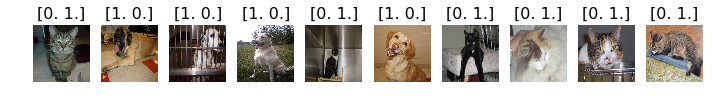

In [6]:
plots(imgs,titles=labels)

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax'),
])

In [8]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches,steps_per_epoch=12,validation_data=valid_batches,validation_steps=5,epochs=5,verbose=2)

Epoch 1/5


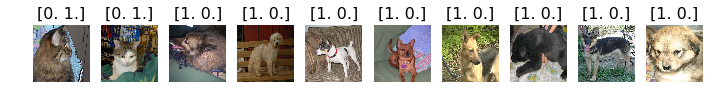

In [187]:
test_imgs , test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [188]:
test_labels = test_labels[:,1]

In [189]:
test_labels

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [190]:
prediction = model.predict_classes(test_imgs,verbose=0)

In [191]:
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [118]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 133s 0us/step


In [120]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [121]:
type(vgg16_model)

keras.engine.training.Model

In [133]:
model = Sequential()
for i in vgg16_model.layers[:-1]:
    model.add(i)

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [136]:
for layer in model.layers:
    layer.trainable = False

In [137]:
model.add(Dense(2,activation='softmax'))

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [139]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
model.fit_generator(train_batches,steps_per_epoch=12,validation_data=valid_batches,validation_steps=10,epochs=5,verbose=2)

Epoch 1/5
 - 201s - loss: 0.9006 - acc: 0.6111 - val_loss: 0.8811 - val_acc: 0.6886
Epoch 2/5
 - 195s - loss: 0.4802 - acc: 0.8130 - val_loss: 0.6285 - val_acc: 0.7716
Epoch 3/5
 - 185s - loss: 0.3092 - acc: 0.8715 - val_loss: 0.5345 - val_acc: 0.8131
Epoch 4/5
 - 224s - loss: 0.2684 - acc: 0.8831 - val_loss: 0.4530 - val_acc: 0.8374
Epoch 5/5
 - 191s - loss: 0.2285 - acc: 0.9083 - val_loss: 0.4179 - val_acc: 0.8443


In [ ]:
test_imgs , test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)
test_labels = test_labels[:,0]
prediction = model.predict_generator(test_batches,steps=1,verbose=0)